The price for the given features is: [170866.99828186]


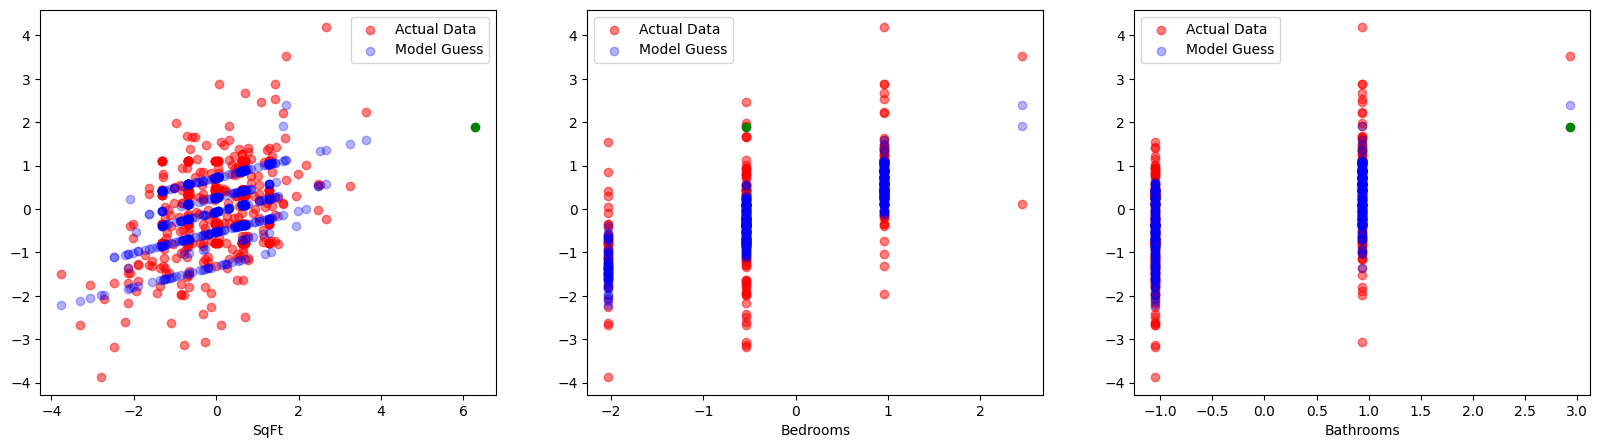

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression_model():
  def model(self, price_sqft, price_bed, price_bath):
    dataFrame = pd.read_csv('house_prices.csv')

    y_prices = dataFrame["Price"].values.reshape(-1, 1)
    x_data = dataFrame[["SqFt","Bedrooms","Bathrooms"]].values

    learning_rate = 0.01
    training = 10000

    # axis means the dimension of the array
    # axis=0 --> 1st dimension n (n x m)
    x_mean = np.mean(x_data, axis=0)
    y_mean = np.mean(y_prices, axis=0)
    
    x_std = np.std(x_data, axis=0)
    y_std = np.std(y_prices, axis=0)

    self.price_sqft = price_sqft
    self.price_bed = price_bed
    self.price_bath = price_bath

    given_x = [price_sqft, price_bed, price_bath]

    # Normalize the entire dataset of features for a better range --> Z-score ((x - mean)/std_dev)
    # axis = 0 means calculate for every column of the dataset
    x_values = (x_data - x_mean)/(x_std)
    given_x_norm = (given_x - x_mean)/(x_std)
    y_norm = (y_prices - y_mean)/(y_std)

    weights = np.random.randn(3,1) # give a randomized array of shape (3,1) for weights
    bias = 0 # set initial bias as 0
    
    for i in range(training):

      #Linear system of equations --> to calculate the optimal weights for each feature from the entire dataset
      # outputs an array of shape (128,1): 128 equations of (w_i * x_i) + b_i
      predict_y = np.dot(x_values,weights) + bias  

      # loss function: calculates the difference betweeen the actual and predicted value for each datapoint
      # cost function: the average of the loss function over the entire dataset
      error = (predict_y - y_norm)

      gradient_descent_w = (1/len(x_values)) * np.dot(x_values.T, error)
      gradient_descent_b = (1/len(x_values) * np.sum(error))

      weights -= learning_rate * gradient_descent_w
      bias -= learning_rate * gradient_descent_b

    #For given x-value of the listed features the model predicts a given y-value (price):
    predicted = np.dot(given_x_norm, weights) + bias
    print(f"The price for the given features is: {((predicted)*np.std(y_prices)) + np.mean(y_prices)}")

    # Visualisation of the dataset for SqFt, Bedrooms, Bathrooms
    fig, ax = plt.subplots(1,3, figsize= (20,5))
    cols = ['SqFt', 'Bedrooms', 'Bathrooms']
    for i in range(3):
        ax[i].scatter(x_values[:, i], y_norm, color='red',alpha=0.5, label='Actual Data')
        ax[i].scatter(x_values[:, i], predict_y, color='blue',alpha=0.3, label='Model Guess')
        ax[i].scatter(given_x_norm[i], predicted, color='green', alpha=0.99)
        ax[i].set_xlabel(cols[i])
        ax[i].legend()
        

    plt.show()      

linear = LinearRegression_model()

input_x1 = int(input("Sqft: "))
input_x2 = int(input("Num of Beds "))
input_x3 = int(input("Num of Baths: "))

linear.model(price_sqft=input_x1, price_bed=input_x2, price_bath=input_x3)
